### Student Information
Name: 李映彤

Student ID: 109072219

GitHub ID:  112713737

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

---

## ***Part 1***

In [1]:
### Begin Assignment Here

# Import libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import nltk
import helpers.data_mining_helpers as dmh

from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)    

## Exercise 1 ##
for i in twenty_train.data[:3]:
    print(i)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))



From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

#### Exercise 2 (take home)

In [2]:
#Sorting dataframe by category index decending
X.sort_values(by='category', ascending=False)

,text,category,category_name
1128,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden) ...,3,soc.religion.christian
540,From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...,3,soc.religion.christian
1474,From: xx155@yfn.ysu.edu (Family Magazine Sysop...,3,soc.religion.christian
1472,From: apodaca@spot.Colorado.EDU (mu'tafikah) S...,3,soc.religion.christian
546,From: mls@panix.com (Michael Siemon) Subject: ...,3,soc.religion.christian
...,...,...,...
308,From: pmoloney@maths.tcd.ie (Paul Moloney) Sub...,0,alt.atheism
305,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism
1815,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
682,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism


In [3]:
## Exercise 3 ##
X[X['category_name'] == 'sci.med'].iloc[::10][0:5]
## Exercise 4 ##
X.isnull().apply(lambda x : dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

#### Exercise 5 (take home)

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
# Answer here
for i in NA_df['missing_example']:
    print(type(i))
    

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


The `isnull()` function can not distinguish string type missing data.

#### Exercise 6 (take home)

In [7]:
# Answer here
X_sample = X.sample(n=1000,random_state=42)
print("Summary of category names of X:")
print(X.category_name.value_counts())
print("Summary of category names of X_sample:")
print(X_sample.category_name.value_counts())

Summary of category names of X:
category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64
Summary of category names of X_sample:
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


#### Exercise 8 (take home)

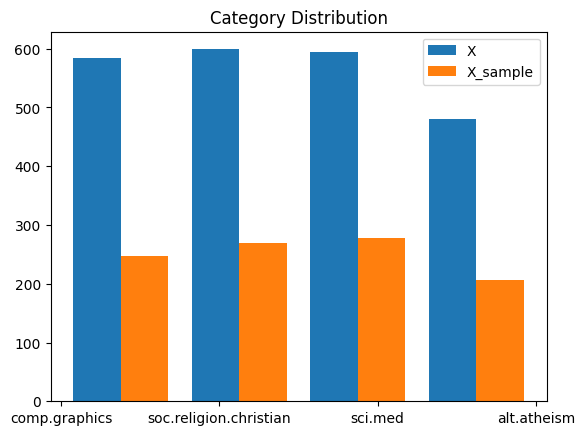

In [8]:
# Answer here
plt.hist([X['category_name'],X_sample['category_name']],
         label=['X','X_sample'],bins=4
         )
plt.title('Category Distribution')
plt.legend()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
# print(count_vect.vocabulary_)
# Exercise 9
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

#### Exercise 10 (take home)

In [10]:
# Answer here

X_counts[0:5, 0:100].toarray()
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:40]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:40].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)


,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,...,term_005148,term_00630,term_008561,term_0094,term_00am,term_00index,term_00pm,term_01,term_0100,term_010116
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see another 1 in row 4 is represented term "01"

#### Exercise 11 (take home)

The `isnull()` function can not distinguish string type missing data

#### Exercise 12 (take home)

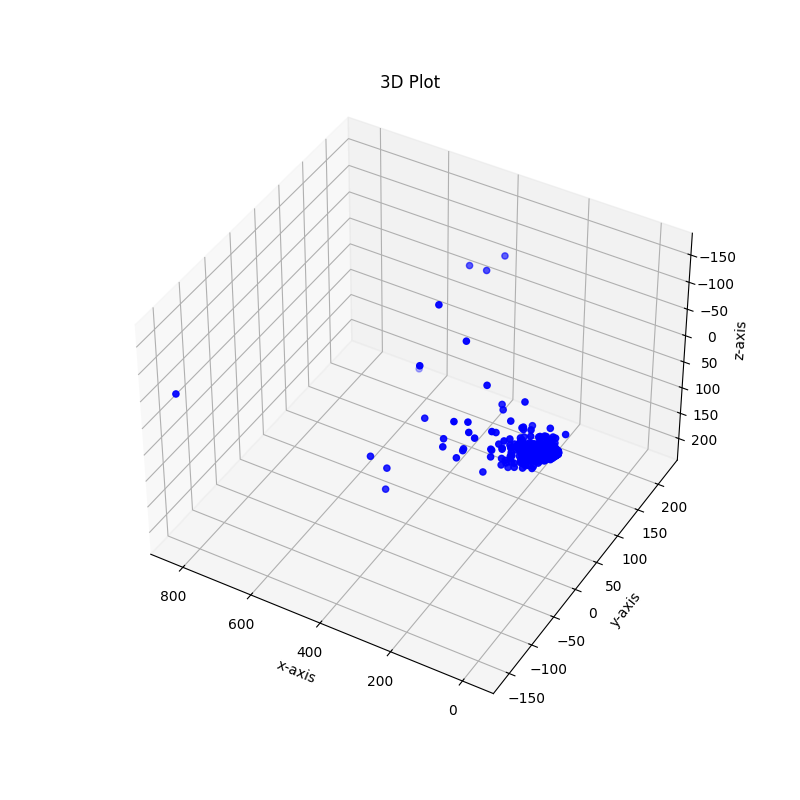

In [34]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA
%matplotlib ipympl
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(projection='3d')

xdata = X_reduced.T[0]
ydata = X_reduced.T[1]
zdata = X_reduced.T[2]

plot_geeks = ax.scatter(xdata, ydata, zdata, color='blue')

ax.set_title("3D Plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
ax.view_init(-140, 60)
# col = ['coral', 'blue', 'black', 'orange']
# for c, category in zip(col, categories):
#     zdata = X_reduced[X['category_name'] == category].T[2]
#     xdata = X_reduced[X['category_name'] == category].T[0]
#     ydata = X_reduced[X['category_name'] == category].T[1]
#     ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');

# ax.grid(color='gray', linewidth=2, alpha=0.2)
# ax.set_xlabel('\nX Label')
# ax.set_ylabel('\nY Label')

# plt.show()

#### Exercise 13 (take home)

In [12]:
import plotly.express as px

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]


In [13]:
fig =  px.bar(x = count_vect.get_feature_names_out()[:300], y =term_frequencies[:300] , title = 'Term Frequency')
fig.show()

#### Exercise 14 (take home)

In [14]:
term_frequencies

array([134,  92,   1, ...,   1,   1,   1], dtype=int64)

#### Exercise 15 (take home)

In [15]:
import plotly.figure_factory as ff

fig =  ff.create_distplot([term_frequencies],'f')
fig.show()

In [16]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

#### Exercise 16 (take home)

In [17]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


---

## ***Part 2***

#### 1. Data Source

In [18]:
imdb_data = pd.read_csv("C:/Users/Ying Tung/Documents/Python/env/DMLab1/DM2023-Lab1-Master/Homework/imdb_labelled.txt", sep=" \t",header=None,names=['sentence','sentiment','company'])
imdb_data['company'] = 'imdb'
amazon_data = pd.read_csv('C:/Users/Ying Tung/Documents/Python/env/DMLab1/DM2023-Lab1-Master/Homework/amazon_cells_labelled.txt', sep="\t",header=None,names=['sentence','sentiment','company'])
amazon_data['company'] = 'amazon'
yelp_data = pd.read_csv('C:/Users/Ying Tung/Documents/Python/env/DMLab1/DM2023-Lab1-Master/Homework/yelp_labelled.txt', sep="\t",header=None,names=['sentence','sentiment','company'])
yelp_data['company'] = 'yelp'

rawdata = pd.concat([imdb_data,amazon_data,yelp_data], axis=0)

C:\Users\Ying Tung\AppData\Local\Temp\ipykernel_22844\22196224.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



#### 2. Data Preperation

#### 3. Data Transformation

In [19]:
rawdata[0:10]

,sentence,sentiment,company
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
5,"The rest of the movie lacks art, charm, meanin...",0,imdb
6,Wasted two hours.,0,imdb
7,Saw the movie today and thought it was a good ...,1,imdb
8,A bit predictable.,0,imdb
9,Loved the casting of Jimmy Buffet as the scien...,1,imdb


#### 4. Data Mining

In [20]:
rawdata.isnull().apply(lambda x : dmh.check_missing_values(x))
sum(rawdata.duplicated())


17

There are 17 duplicated values, we can apply `drop.duplicates()` function to drop them.

In [21]:
rawdata.drop_duplicates(keep=False,inplace=True)
len(rawdata)

2966

#### 5. Data Preprocessing

In [22]:
data_sample = rawdata.sample(n=1000, random_state=8)
display(data_sample)

print(rawdata.sentiment.value_counts())
print(data_sample.sentiment.value_counts())

,sentence,sentiment,company
653,Utter crap.. Sound quality is TERRIBLE.,0,amazon
561,Please dont waste your money.,0,amazon
236,best bluetooth on the market.,1,amazon
801,For the price this was a great deal.,1,amazon
882,"The acting sucks, the music sucks, the script ...",0,imdb
...,...,...,...
365,"I find wasting food to be despicable, but this...",0,yelp
706,So anyone near you will hear part of your conv...,0,amazon
44,Excellent bluetooth headset.,1,amazon
265,"All things considered, a job very well done.",1,imdb


sentiment
0    1486
1    1480
Name: count, dtype: int64
sentiment
0    506
1    494
Name: count, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

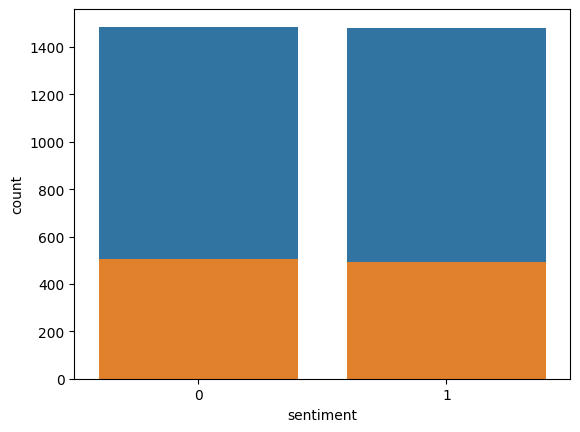

In [23]:

sns.countplot(x='sentiment',data=rawdata)
sns.countplot(x='sentiment',data=data_sample)

#### Feature Creation

In [24]:
rawdata['unigrams'] = rawdata['sentence'].apply(lambda x: dmh.tokenize_text(x))

counter = CountVectorizer()
rawdata_counts = counter.fit_transform(rawdata.sentence)

#### Heat Plot

In [25]:
plot_x = ["term_"+str(i) for i in counter.get_feature_names_out()[:]]
plot_y = ["doc_"+ str(i) for i in list(rawdata.index)[:]]
plot_z = rawdata_counts[:, :].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_yucky,term_yukon,term_yum,term_yummy,term_yun,term_z500a,term_zero,term_zillion,term_zombie,term_zombiez
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



#### Dimentionality Reduction

[[-0.82827115 -0.24592458]
 [ 1.25850774 -0.94347843]
 [ 2.94134995  0.88864178]
 ...
 [-0.50570321  0.41610358]
 [ 0.49212526  0.36937312]
 [ 2.32719771 -0.477282  ]]


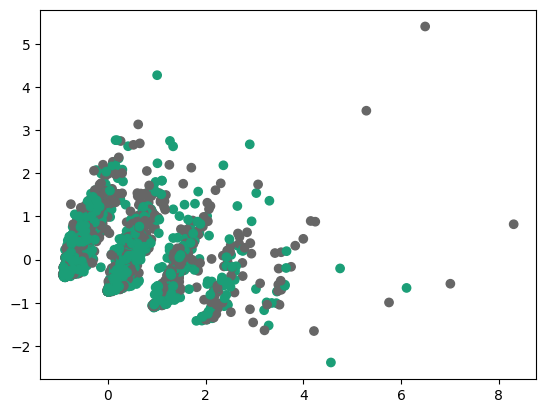

In [26]:
from matplotlib import cm
rawdata_reduced = PCA(n_components = 2).fit_transform(rawdata_counts.toarray())
print(rawdata_reduced)
dy = rawdata.sentiment
plt.scatter(rawdata_reduced[:,0],rawdata_reduced[:,1],c=dy, cmap='Dark2')

#### Aggregation

In [27]:
frequencies = []

for j in range(0,rawdata_counts.shape[1]):
    frequencies.append(sum(rawdata_counts[:,j].toarray()))
frequencies = np.asarray(rawdata_counts.sum(axis=0))
freq_df = pd.DataFrame(tfidf_vect,frequencies)


NameError: name 'tfidf_vect' is not defined

In [ ]:
raw_fig =  px.bar(x = tfidf_vect.get_feature_names_out()[:30], y =frequencies[:30] , title = 'Term Frequency')
raw_fig.show()


In [ ]:
fig =  ff.create_distplot([frequencies],'f')
fig.show()

#### 6. Data Exploration

---

## ***Part 3***

In [ ]:
from wordcloud import WordCloud,STOPWORDS

text = ' '.join(i for i in rawdata['sentence'])

cloud = WordCloud(width=3000,height=2000,random_state=1,background_color='white',colormap='twilight',collocations=False,stopwords=STOPWORDS).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()


'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  Very little music or anything to speak of.  The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  The rest of the movie lacks art, charm, meaning... If it\'s about emptiness, it works I guess because it\'s empty.  Wasted two hours.  Saw the movie today and thought it was a good effort, good messages for kids.  A bit predictable.  Loved the casting of Jimmy Buffet as the science teacher.  And those baby owls were adorable.  The movie showed a lot of Florida at it\'s best, made it look very appealing.  The Songs Were The Best And The Muppets Were So Hilarious.  It Wa

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
data_tfidf = tfidf_vect.fit_transform(rawdata.sentence)
tfidf_vect.get_feature_names_out()
data_tfidf.toarray()

plot_x = ["term_"+str(i) for i in tfidf_vect.get_feature_names_out()[:]]
plot_y = ["doc_"+ str(i) for i in list(rawdata.index)[:]]
plot_z = data_tfidf[:, :].toarray()
todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(todraw)

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_yucky,term_yukon,term_yum,term_yummy,term_yun,term_z500a,term_zero,term_zillion,term_zombie,term_zombiez
doc_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc_998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# sns.heatmap(data=data_tfidf)
sns.catplot(x="se", y="pulse", hue="kind", col="diet", data=exercise)

ValueError: Must pass 2-d input. shape=()

---

## ***Part 4***